<a href="https://colab.research.google.com/github/Sahil2004/cs-practicals/blob/main/6th%20sem/%5B01%5D%20Data%20Mining%20and%20Analysis/%5B10%5D%20Practical%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [163]:
dataset = pd.read_csv('/content/CO22358_gearpartsales.csv')
X = dataset.iloc[:, [1, 2, 3, 4, 6]].values

In [165]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'mean', missing_values = np.nan)
imputer=imputer.fit(X[:,4:])
X[:,4:]=imputer.transform(X[:,4:])

In [166]:
dataset['Sold More than 90%'] = (dataset['Sales Quantity'] / dataset['Quantity Produced'])
dataset['Sold More than 90%'] = dataset['Sold More than 90%'].apply(lambda x: 0 if x > 0.91 else 1)
y = dataset.iloc[:, 8].values

In [167]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X=LabelEncoder()
for col in range(X.shape[1]):  # Loop through all columns
    X[:, col] = labelencoder_X.fit_transform(X[:, col])  # Ensure 1D conversion

from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
  [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1,2,3])],
  remainder='passthrough'
)
X = ct.fit_transform(X)
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [169]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=False)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [85]:
y_pred = classifier.predict(X_test)

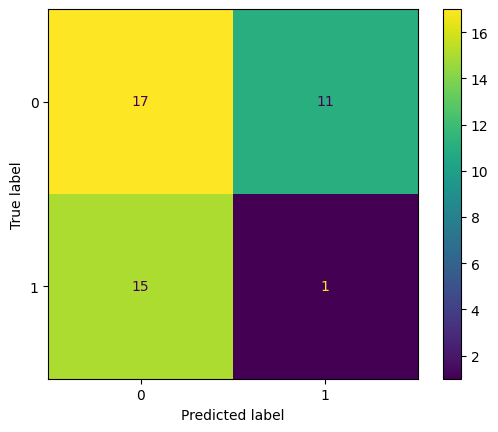

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

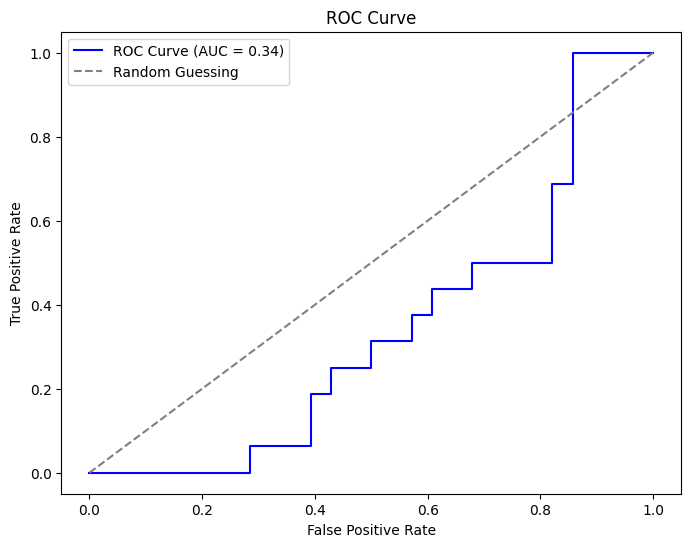

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [90]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.4090909090909091
Recall:  0.6071428571428571
Precision:  0.53125
F1 Score:  0.5666666666666667


## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
y_pred = classifier.predict(X_test)

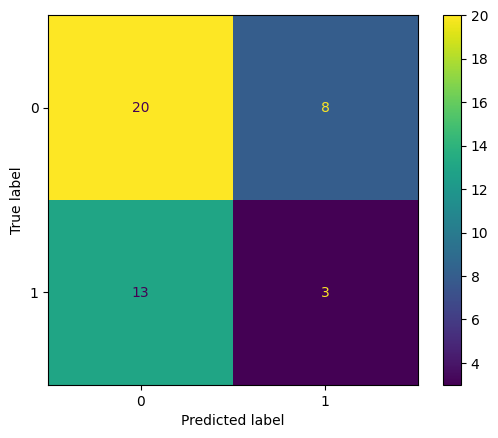

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

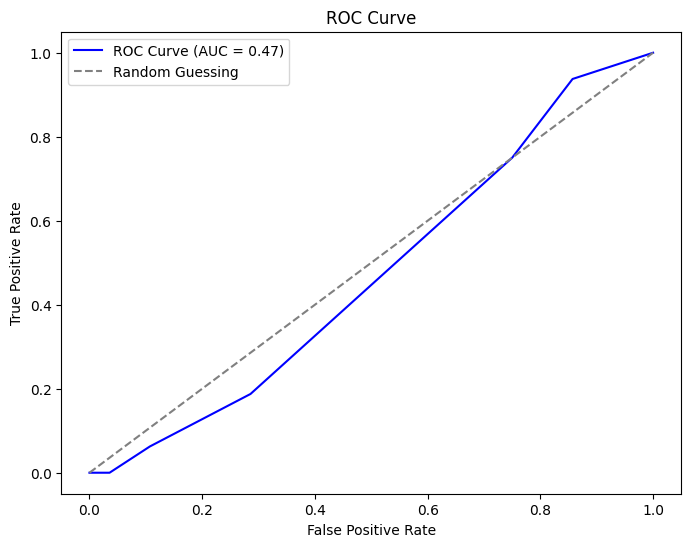

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [105]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.7142857142857143
Precision:  0.6060606060606061
F1 Score:  0.6557377049180327


## SVM

In [113]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [114]:
y_pred = classifier.predict(X_test)

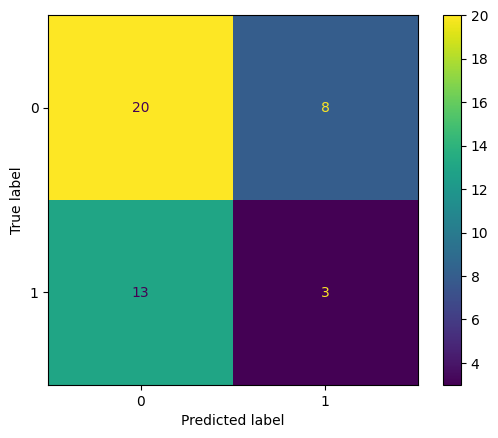

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

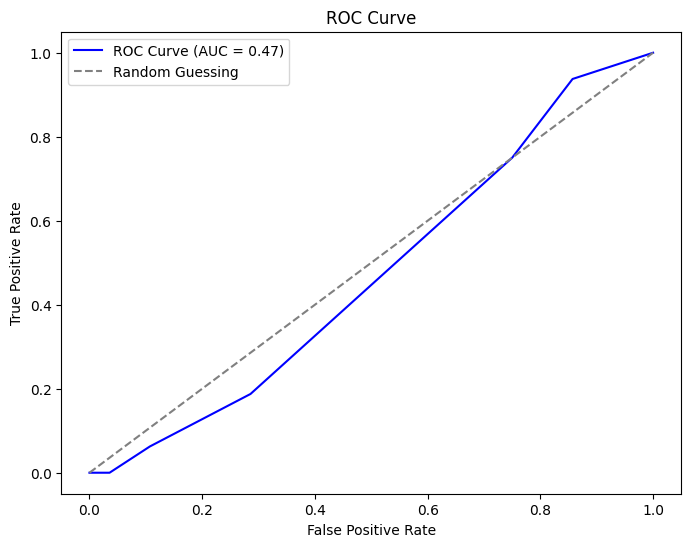

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [117]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.7142857142857143
Precision:  0.6060606060606061
F1 Score:  0.6557377049180327


## Kernel SVM

In [125]:
from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel='rbf', random_state=0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [126]:
y_pred = classifier.predict(X_test)

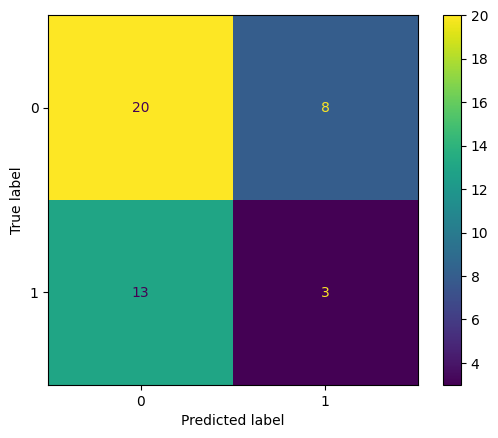

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

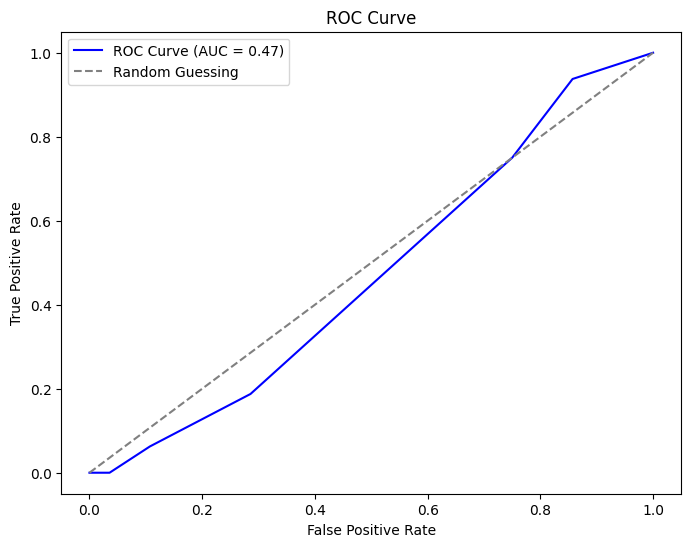

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [129]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.7142857142857143
Precision:  0.6060606060606061
F1 Score:  0.6557377049180327


## Naive Bayes

In [139]:
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_dense, y_train)

GaussianNB()

In [141]:
y_pred = nb_classifier.predict(X_test_dense)

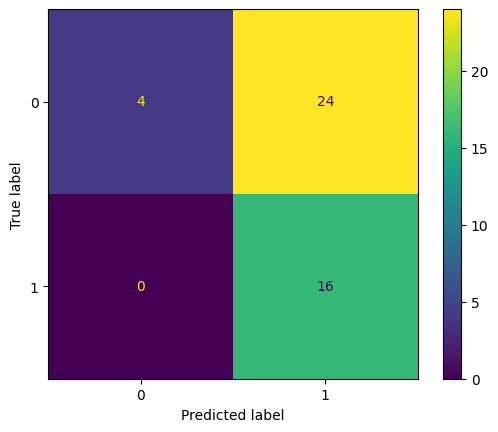

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

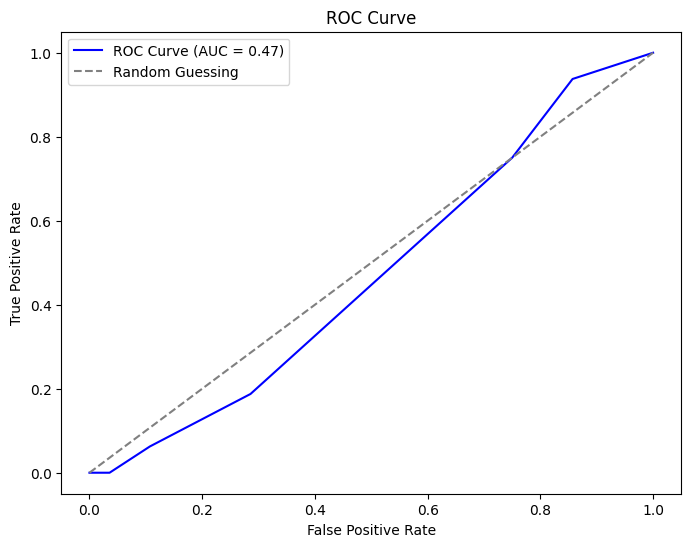

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = classifier.predict_proba(X_test_dense)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [144]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.45454545454545453
Recall:  0.14285714285714285
Precision:  1.0
F1 Score:  0.25


## Decision Trees

In [157]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [158]:
y_pred = classifier.predict(X_test)

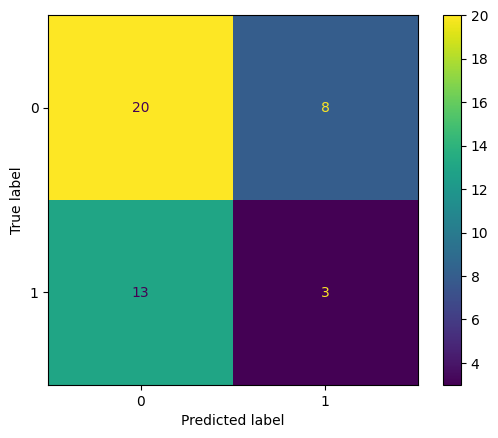

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

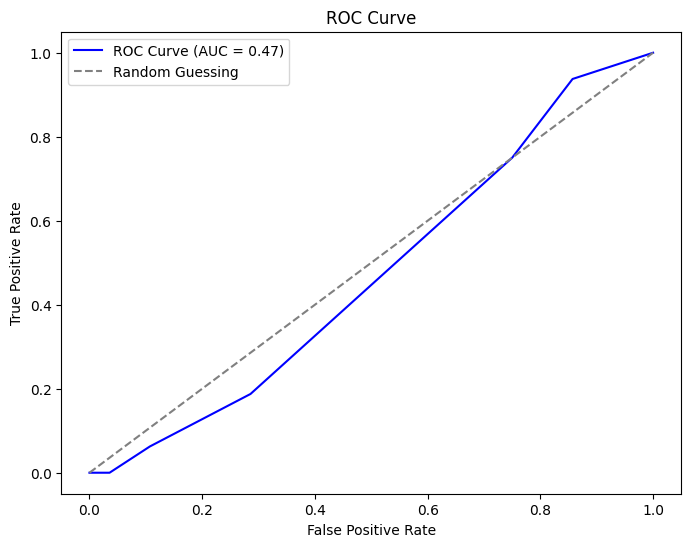

In [160]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [161]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.7142857142857143
Precision:  0.6060606060606061
F1 Score:  0.6557377049180327


## Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [172]:
y_pred = classifier.predict(X_test)

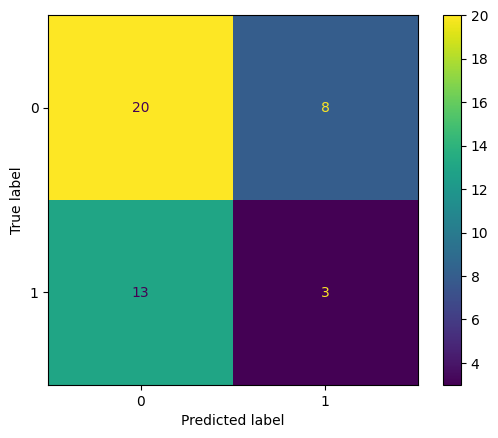

In [173]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

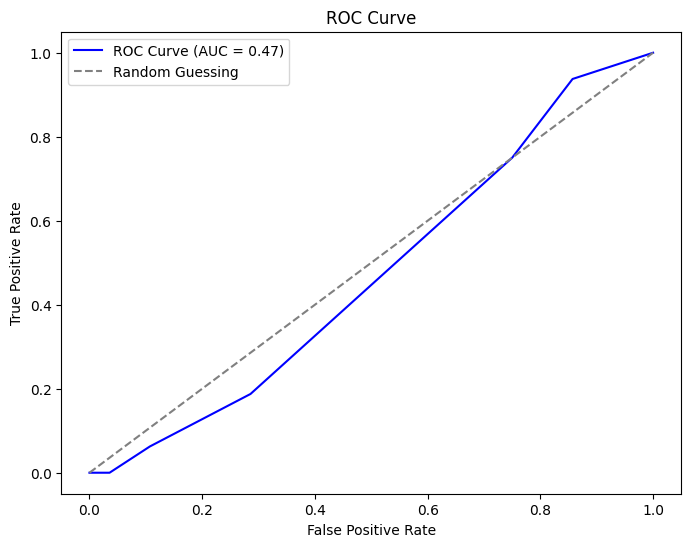

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [175]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.7142857142857143
Precision:  0.6060606060606061
F1 Score:  0.6557377049180327
